<a href="https://colab.research.google.com/github/olusipedaniel/zero-to-mastery-exercises/blob/main/04_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Build and fit a model using the same data we have here but with the MobileNetV2 architecture feature extraction (mobilenet_v2_100_224/feature_vector) from TensorFlow Hub, how does it perform compared to our other models?
2. Name 3 different image classification models on TensorFlow Hub that we haven't used.
3. Build a model to classify images of two different things you've taken photos of.
  * You can use any feature extraction layer from TensorFlow Hub you like for this.
  * You should aim to have at least 10 images of each class, for example to build a fridge versus oven classifier, you'll want 10 images of fridges and 10 images of ovens.
4. What is the current best performing model on ImageNet?
  * Hint: you might want to check sotabench.com for this.

### 1. Build and fit a model using the same data we have here but with the MobileNetV2 architecture feature extraction (mobilenet_v2_100_224/feature_vector) from TensorFlow Hub, how does it perform compared to our other models?

In [1]:
# Importting tensorflow 
import tensorflow as tf
tf.__version__

'2.8.2'

In [2]:
# Getting data (10% of 10 classes of Food101 dataset)
import zipfile

# Downloading the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzipping the downloaded file
zip_ref=zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-05 20:44:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   166MB/s    in 1.0s    

2022-07-05 20:44:03 (166 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
# Checking how many images in each folder
import os

# Walk through the 10 percent data directory and list the number the number of files
for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} and {len(filenames)} images in {dirpath}.")

There are 2 and 0 images in 10_food_classes_10_percent.
There are 10 and 0 images in 10_food_classes_10_percent/train.
There are 0 and 75 images in 10_food_classes_10_percent/train/ramen.
There are 0 and 75 images in 10_food_classes_10_percent/train/chicken_curry.
There are 0 and 75 images in 10_food_classes_10_percent/train/pizza.
There are 0 and 75 images in 10_food_classes_10_percent/train/hamburger.
There are 0 and 75 images in 10_food_classes_10_percent/train/grilled_salmon.
There are 0 and 75 images in 10_food_classes_10_percent/train/chicken_wings.
There are 0 and 75 images in 10_food_classes_10_percent/train/steak.
There are 0 and 75 images in 10_food_classes_10_percent/train/fried_rice.
There are 0 and 75 images in 10_food_classes_10_percent/train/sushi.
There are 0 and 75 images in 10_food_classes_10_percent/train/ice_cream.
There are 10 and 0 images in 10_food_classes_10_percent/test.
There are 0 and 250 images in 10_food_classes_10_percent/test/ramen.
There are 0 and 250 im

In [4]:
# Setting up path into the directory
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [5]:
# Loading images into batches using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defining image size and batch size
IMG_SIZE=(224,224)
BTH_SIZE=32

# Preprocessing data (getting all the pixel values between 0 and 1 also called scaling/normalization)
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

# Import data from directory and turn them into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=BTH_SIZE,
                                             seed=42)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=BTH_SIZE,
                                           seed=42)

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [6]:
# Getting class_names programmatically
import numpy as np
import pathlib

data_dir=pathlib.Path("10_food_classes_10_percent/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [7]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_images(target_dir,classes):
  for i in range(4):
    plt.subplot(2,2,i+1)
    # Setting up target folder 
    target_class=random.choice(classes)
    target_folder=target_dir+"/"+target_class

    # Setting up random image path
    random_image=random.sample(os.listdir(target_folder),1)
    target_image=target_folder+"/"+random_image[0]

    # Read in the images and plot it using matplotlib 
    img=mpimg.imread(target_image)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

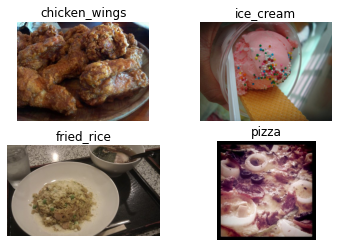

In [8]:
view_random_images("10_food_classes_10_percent/train",
                   classes=class_names)

In [9]:
# Getting the URL link to the mobilenet_v2_100_224
mobilenet_v2_100_224="https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

In [10]:
# importting tensorflow hub
import tensorflow_hub as hub

# Creating feature extraction model
mobilenet_model=tf.keras.Sequential([
  hub.KerasLayer(handle=mobilenet_v2_100_224,
                  trainable=False,
                  input_shape=IMG_SIZE+(3,)),
  tf.keras.layers.Dense(10,activation="softmax",name="output_layer")
])

# Compile model
mobilenet_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics="accuracy")

# Fit the model
mobilenet_model_history=mobilenet_model.fit(train_data,
                                            epochs=5,
                                            steps_per_epoch=len(train_data),
                                            validation_data=test_data,
                                            validation_steps=len(test_data))

Epoch 1/5
24/24 [==============================] - 29s 671ms/step - loss: 1.8695 - accuracy: 0.3787 - val_loss: 1.2738 - val_accuracy: 0.6280
Epoch 2/5
24/24 [==============================] - 15s 632ms/step - loss: 1.0117 - accuracy: 0.7133 - val_loss: 0.8823 - val_accuracy: 0.7496
Epoch 3/5
24/24 [==============================] - 15s 630ms/step - loss: 0.7429 - accuracy: 0.7880 - val_loss: 0.7498 - val_accuracy: 0.7716
Epoch 4/5
24/24 [==============================] - 15s 629ms/step - loss: 0.5854 - accuracy: 0.8467 - val_loss: 0.6850 - val_accuracy: 0.7924
Epoch 5/5
24/24 [==============================] - 15s 628ms/step - loss: 0.4839 - accuracy: 0.8773 - val_loss: 0.6538 - val_accuracy: 0.7928


In [11]:
mobilenet_model.evaluate(test_data)

79/79 [==============================] - 12s 150ms/step - loss: 0.6538 - accuracy: 0.7928


[0.6538435220718384, 0.7928000092506409]

In [12]:
mobilenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [13]:
# Importting matplotlib
import matplotlib.pyplot as plt

# Creating a function to plot loss curves
def plot_loss_curves(history):

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  epochs=range(len(history.history["loss"]))

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  # Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss curves")
  plt.xlabel("epoch")
  plt.legend();

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy curves")
  plt.xlabel("Epochs")
  plt.legend();

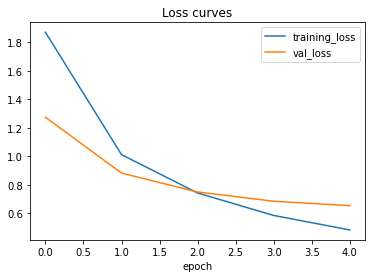

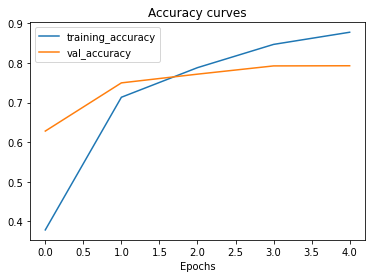

In [14]:
# Plotting loss curves
plot_loss_curves(mobilenet_model_history)

In [15]:
def plot_predictions(model,target_dir):
  for i in range(4):
    plt.subplot(2,2,i+1)

    # Setting up target folder 
    target_class=random.choice(class_names)
    target_folder=target_dir+"/"+target_class

    # Setting up random image path
    random_image=random.sample(os.listdir(target_folder),1)
    target_image=target_folder+"/"+random_image[0]

    # Read in the images
    img=tf.io.read_file(target_image)
    # Decode image into a tensor
    img=tf.image.decode_image(img)
    # Resize the images
    img=tf.image.resize(img,size=[224,224])
    # Rescale the image
    img=img/255.

    # Make a prediction
    pred=model.predict(tf.expand_dims(img,axis=0))
    # Get the highest predicted probability
    pred_prob=tf.argmax(pred,axis=1)
    # Get the class of the predicted prbability
    target_class=class_names[pred_prob]
    # Plot the image and the predicted class
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


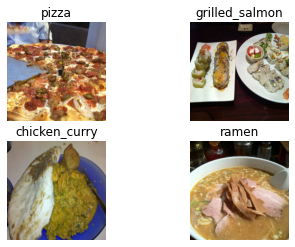

In [16]:
# Making and plotting predictions
plot_predictions(model=mobilenet_model,
                target_dir="10_food_classes_10_percent/test")

### 2. Name 3 different image classification models on TensorFlow Hub that we haven't used.

* RegnetY models
* NASNet models
* Inception models
* ConvNeXt

### 3. Build a model to classify images of two different things you've taken photos of using 

In [17]:
# Mounting drive on colab
from google.colab import drive
drive.mount("drive")

Mounted at drive


In [18]:
# Setting up paths to train data
my_train_dir="/content/drive/MyDrive/cars_and_motorbikes"

In [19]:
# Checking the number of directories and images in train data
for dirpath,dirnames,filenames in os.walk("/content/drive/MyDrive/cars_and_motorbikes"):
  print(f"There are {len(dirnames)} directory and {len(filenames)} images in {dirpath}.")

There are 2 directory and 0 images in /content/drive/MyDrive/cars_and_motorbikes.
There are 0 directory and 10 images in /content/drive/MyDrive/cars_and_motorbikes/motorbikes.
There are 0 directory and 10 images in /content/drive/MyDrive/cars_and_motorbikes/cars.


In [20]:
my_class_names=["cars","motorbikes"]
my_class_names

['cars', 'motorbikes']

In [21]:
BTH_SIZE_1=1

# Loading images into batches using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing data (getting all the pixel values between 0 and 1 also called scaling/normalization)
my_train_datagen=ImageDataGenerator(rescale=1/255.,
                                    validation_split=0.2)

# Import data from directory in batches and split them into training and validation data
my_train_data=my_train_datagen.flow_from_directory(directory=my_train_dir,
                                                   target_size=IMG_SIZE,
                                                   batch_size=BTH_SIZE_1,
                                                   class_mode="binary",
                                                   subset="training",
                                                   seed=42)

my_valid_data=my_train_datagen.flow_from_directory(directory=my_train_dir,
                                                   target_size=IMG_SIZE,
                                                   batch_size=BTH_SIZE_1,
                                                   class_mode="binary",
                                                   subset="validation",
                                                   seed=42)

Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


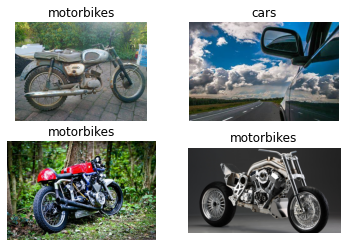

In [22]:
view_random_images(target_dir="/content/drive/MyDrive/cars_and_motorbikes",
                   classes=my_class_names)

#### 1. Using mobilenet_v2_100_224_feature_vector

In [23]:
# Creating feature extraction model
mobilenet_model_1=tf.keras.Sequential([
  hub.KerasLayer(handle=mobilenet_v2_100_224,
                  trainable=False,
                  input_shape=IMG_SIZE+(3,)),
  tf.keras.layers.Dense(1,activation="sigmoid",name="output_layer")
])

# Compile model
mobilenet_model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics="accuracy")

# Fit the model
mobilenet_model_history_1=mobilenet_model_1.fit(my_train_data,
                                                epochs=5,
                                                steps_per_epoch=len(my_train_data),
                                                validation_data=my_valid_data,
                                                validation_steps=len(my_valid_data))

Epoch 1/5
16/16 [==============================] - 8s 263ms/step - loss: 0.7577 - accuracy: 0.4375 - val_loss: 0.8757 - val_accuracy: 0.2500
Epoch 2/5
16/16 [==============================] - 0s 23ms/step - loss: 0.3606 - accuracy: 0.9375 - val_loss: 0.6678 - val_accuracy: 0.5000
Epoch 3/5
16/16 [==============================] - 0s 23ms/step - loss: 0.2005 - accuracy: 1.0000 - val_loss: 0.5288 - val_accuracy: 0.7500
Epoch 4/5
16/16 [==============================] - 0s 23ms/step - loss: 0.1187 - accuracy: 1.0000 - val_loss: 0.4576 - val_accuracy: 1.0000
Epoch 5/5
16/16 [==============================] - 0s 25ms/step - loss: 0.0868 - accuracy: 1.0000 - val_loss: 0.4079 - val_accuracy: 1.0000


In [24]:
mobilenet_model_1.evaluate(my_valid_data)

4/4 [==============================] - 0s 27ms/step - loss: 0.4079 - accuracy: 1.0000


[0.4078744053840637, 1.0]

In [25]:
mobilenet_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 output_layer (Dense)        (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


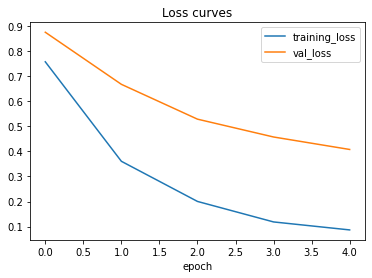

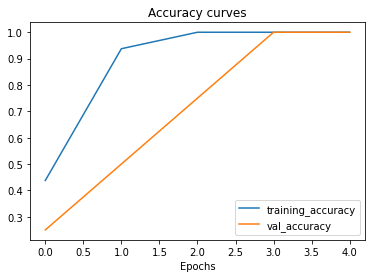

In [26]:
plot_loss_curves(mobilenet_model_history_1)

### 4. What is the current best performing model on ImageNet?

* The current best performing model on imageNet is COCA(finetuned)

